# Supplemental Figure S10 – The reactivity distribution for Flank-WC pairs and non-WC under denaturing conditions

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [3]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [4]:
df_denature_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_denature_residues_2000.json"
)
df_denature_res["ln_r_data"] = df_denature_res["ln_r_data"].replace(-np.inf, -9.8)

# Plotting

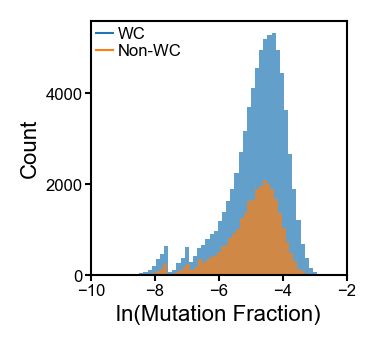

In [5]:
fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)

ax.hist(
    df_denature_res.query(
        "(r_type == 'WC' or r_type == 'Flank-WC') and ln_r_data > -9"
    )["ln_r_data"],
    bins=50,
    alpha=0.7,
    label="Flank-WC",
)
ax.hist(
    df_denature_res.query("r_type == 'NON-WC' and ln_r_data != -9.8")["ln_r_data"],
    bins=50,
    alpha=0.7,
    label="NON-WC",
)
ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
ax.set_ylabel("Count", labelpad=2)
ax.set_xlim(-10, -2)
ax.set_xticks([-10, -8, -6, -4, -2])
add_legend(ax, ["WC", "Non-WC"], loc="upper left")
publication_style_ax(ax)
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s10.png",
    dpi=600,
    bbox_inches="tight",
)